In [203]:
# !/usr/bin/env python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
# 1.User case driven preprocessing
# import the data
file_path="D:/DA/melb_data.csv"
df = pd.read_csv(file_path, header=0)
# check data dimensions
df.shape 

(13580, 21)

In [205]:
# check the first 3 rows of data
df.head(3)   # default 5

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [206]:
# Attributes(including features and the target (class))
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [207]:
# null data and rate
df.isnull().sum().sort_values(ascending=False)   #df.isnull().any(axis=0).sum()  4

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

In [208]:
na_count = df.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(4)      #某一特征的数据缺失量达到XXX%以上，这项特征应该予以删除  无缺失值的不相关feature是否可以删除

,count,ratio
BuildingArea,6450,0.474963
YearBuilt,5375,0.395803
CouncilArea,1369,0.100810
Car,62,0.004566


In [209]:
# the target (class)
df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B45D33E88>,
      dtype=object)

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


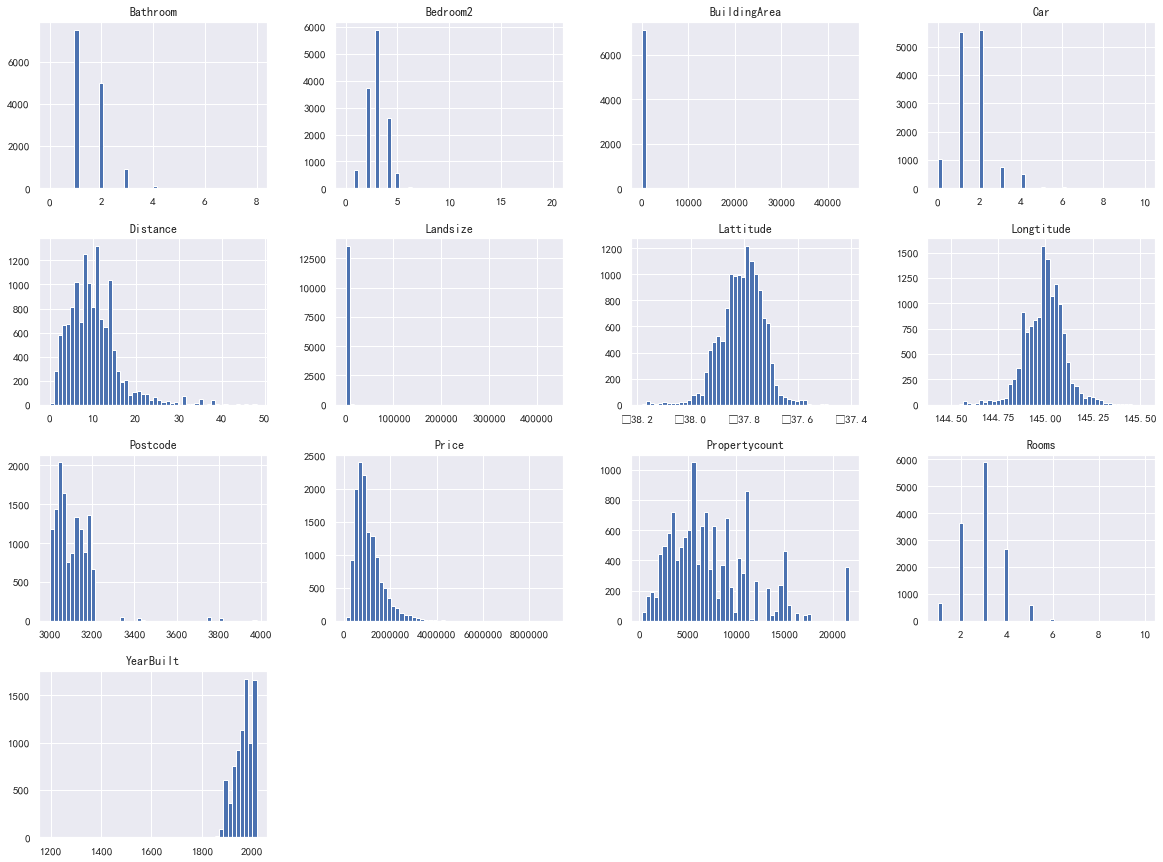

In [210]:
# the distribution of each numerical feature  每个特征值的分布
df.hist(bins=50,figsize=(20,15))

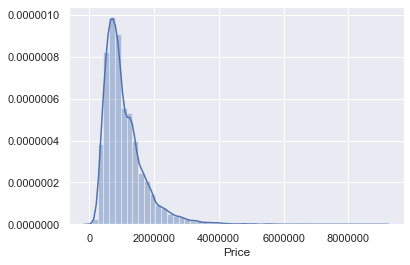

In [211]:
sns.set()
sns.distplot(df['Price'])

In [212]:
print("The Skewness is：{}".format(df['Price'].skew()))  # 偏度（Skewness）

The Skewness is：2.239624312529873


In [213]:
print("The Kurtosis is：{}".format(df['Price'].kurt()))  # 峰度(Kurtosis)

The Kurtosis is：9.87433888590604


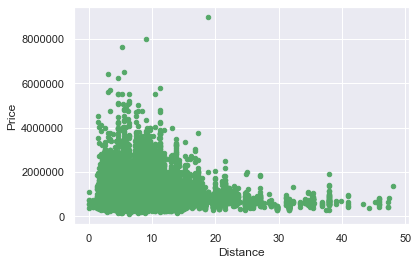

In [214]:
# Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
#        'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
#        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
#        'Longtitude', 'Regionname', 'Propertycount'],
#       dtype='object')

var='Distance'
data=pd.concat([df[var],df['Price']],axis=1)
data.plot.scatter(x=var,y='Price',c='g')

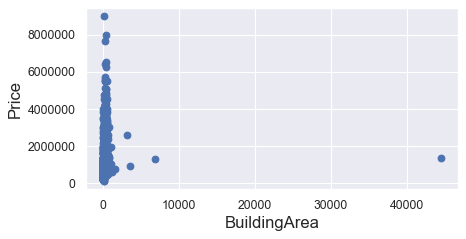

In [215]:
# check outliers
# Set the figure size (width, height)  dpi:The number of dots per inch of the graph
plt.figure(figsize=(6,3),dpi=80,num=5)
plt.scatter(x=df['BuildingArea'], y=df['Price'])
plt.xlabel('BuildingArea', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [216]:
# delete outliers
df = df.drop(df[(df['BuildingArea']>40000) & (df['Price']<2000000)].index)

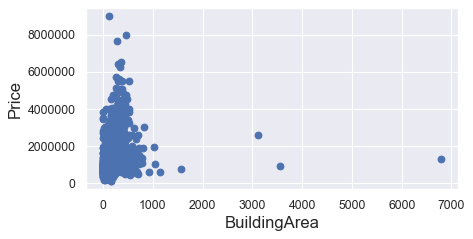

In [217]:
# check outliers
plt.figure(figsize=(6,3),dpi=80,num=5)
plt.scatter(x=df['BuildingArea'], y=df['Price'])
plt.xlabel('BuildingArea', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [218]:
# 2.clean mal-formatted data
df['Date']= pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,...,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,12,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,...,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2,2016
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,...,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,3,2017


In [219]:
df.shape

(13579, 23)

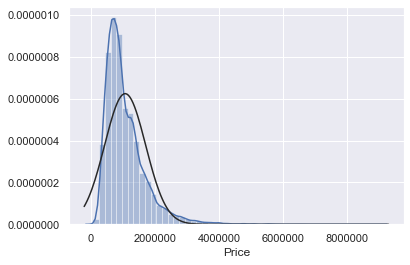

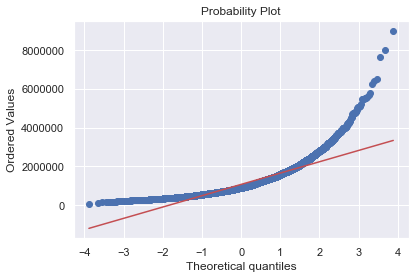

In [220]:
# Normal Distribution Conversion 样本正态分布转换
from scipy.stats import norm
from scipy.stats import *
from scipy import stats  # Test normal distribution
# normality
# Histogram直方图：检验峰度和偏态
# 正态分布概率图：数据的分布应该尽量与正态分布一致
sns.distplot(df['Price'],fit=norm)
# Test normal distribution  (Red - normal distribution, blue - instances)
fig=plt.figure()
res=stats.probplot(df['Price'],plot=plt)

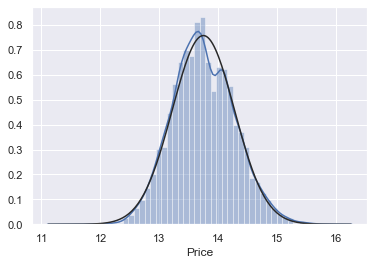

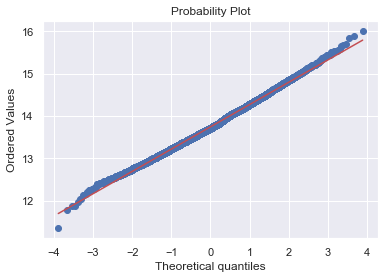

In [221]:
# log transformation
df['Price']=np.log(df['Price'])
sns.distplot(df['Price'],fit=norm)
fig=plt.figure()
res=stats.probplot(df['Price'],plot=plt)

In [224]:
# 3.Fill na data
# BuildingArea	6450	0.474963 YearBuilt	5375	0.395803  CouncilArea	1369	0.100810  Car	62	0.004566

df['Car'] = df['Car'].fillna('0')  # -99
df['CouncilArea'] = df['CouncilArea'].fillna(method='pad')
df['BuildingArea'] = df['Car'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

In [230]:
# double-check missing value
missing_data = df.isnull().sum().sort_values(ascending=False)
# na_rate = na_count / len(df)
# na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
# na_data.head(4) 
missing_data = pd.DataFrame({"Missing value" : missing_data})
missing_data.head(4)

,Missing value
Year,0
Bedroom2,0
Address,0
Rooms,0


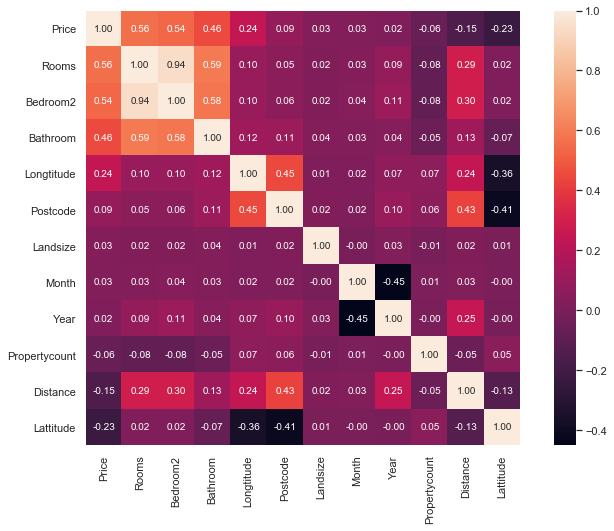

In [235]:
# 4.Any new column/feature can be extracted
# the correlation coefficient matrix
corrmat = df.corr()
plt.subplots(figsize=(12,8))
k = 12
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [236]:
df[cols].columns

Index(['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Longtitude', 'Postcode',
       'Landsize', 'Month', 'Year', 'Propertycount', 'Distance', 'Lattitude'],
      dtype='object')

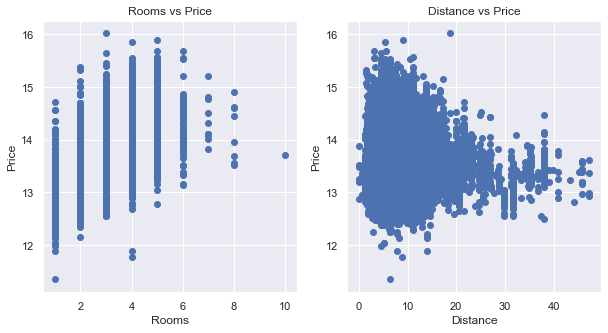

In [244]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(x=df['Rooms'], y=df['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Rooms vs Price')
plt.subplot(1, 2, 2)
plt.scatter(x=df['Distance'], y=df['Price'])
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Distance vs Price')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


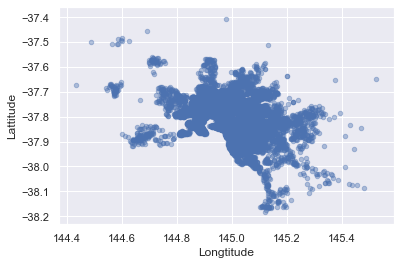

In [238]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4) 

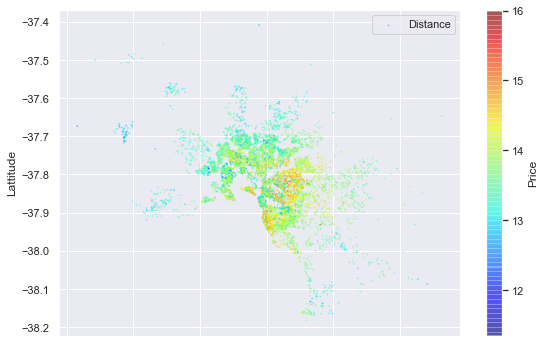

In [239]:
df.plot(kind='scatter',x='Longtitude',y='Lattitude',alpha=0.4,
            s=df['Distance']/50,label='Distance',
            c='Price',cmap=plt.get_cmap("jet"),colorbar=True,
            figsize=(9,6))

In [240]:
#df.info()

In [241]:
# 4.Delete correlated /non-useful columns
df.drop('Postcode', axis=1, inplace=True)  #non-useful columns
df.drop('Propertycount', axis=1, inplace=True) # correlated columns (Suburb & Propertycount)

In [243]:
df.shape

(13579, 21)

In [245]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Month,Year
0,Abbotsford,85 Turner St,2,h,14.207553,S,Biggin,2016-12-03,2.5,2,...,1,202,1,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,12,2016
1,Abbotsford,25 Bloomburg St,2,h,13.849912,S,Biggin,2016-02-04,2.5,2,...,0,156,0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,2,2016
2,Abbotsford,5 Charles St,3,h,14.197366,SP,Biggin,2017-03-04,2.5,3,...,0,134,0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,3,2017
3,Abbotsford,40 Federation La,3,h,13.652992,PI,Biggin,2017-03-04,2.5,3,...,1,94,1,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,3,2017
4,Abbotsford,55a Park St,4,h,14.285514,VB,Nelson,2016-06-04,2.5,3,...,2,120,2,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,6,2016
